## Proof majority voting

In [1]:
from scipy.special import comb
import math
import numpy as np
import matplotlib.pyplot as plt

### Error rate of majority voting
The probability of the majority of the classifiers classifying wrong using the binomial distribution

In [2]:
def ensemble_error(n_classifier, error):
    # n_classifiers: number of base classifiers
    # error: error rate per classifier

    k_start = math.ceil(n_classifier / 2.) # We have a majority of errors for k_start or more

    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k) # Binomial distribution
             for k in range(k_start, n_classifier + 1)]
    
    return sum(probs) # Cummulative probability from k_start

In [3]:
ensemble_error(n_classifier=11, error=0.3)

0.07822479095999996

### Effect of error-rate
Visualize the relationship between ensemble and range (0,1) of base errors in a line graph

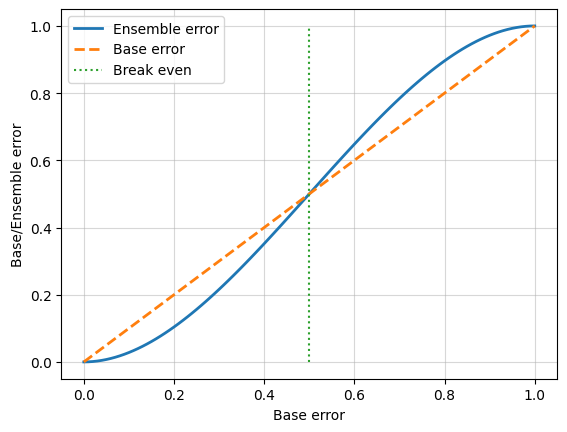

In [4]:
error_range = np.arange(0.0, 1.01, 0.01) 
ens_errors = [ensemble_error(n_classifier=3, error=error) for error in error_range]

# Ensamble models
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
# Single CLS
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)

plt.plot([0.5, 0.5], [0, 1], linestyle=':', label='Break even', linewidth=1.5)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()